# Marketing Campaign Project

### Problem Scenario: ‘Marketing mix’ is a popular concept used in implementing marketing strategies. A marketing mix includes multiple areas of focus as part of a comprehensive marketing plan. This all revolves around the four Ps of marketing - product, price, place, and promotion.

### Problem Objective: We'll perform exploratory data analysis and hypothesis testing. The goal is to gain a better understanding of the various factors that contribute to customer acquisition.

### We'll test the following hypotheses:

- Older people are not as tech-savvy and probably prefer shopping in-store.
- Customers with kids probably have less time to visit a store and would prefer to shop online.
- Other distribution channels may cannibalize sales at the store.
- Does the US fare significantly better than the rest of the world in terms of total purchases?

### We'll use appropriate visualizations to help analyze the following:

- Which products are performing the best, and which are performing the least in terms of revenue?
- Is there any pattern between the age of customers and the last campaign acceptance rate?
- Which Country has the greatest number of customers who accepted the last campaign?
- Is there any pattern in the no. of children at home and total spend?
- Education background of the customers who complained in the last 2 years.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, gaussian_kde, binom, poisson,norm,uniform

## We will first create a data frame from the csv containing the data

In [3]:
mdata = pd.read_csv('marketing_data.csv') # Create dataframe from csv file
print(mdata.head(10)) # print first 10 rows of the dataframe
print(mdata.columns)  # print column names

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   
5   7348        1958         PhD         Single  $71,691.00         0   
6   4073        1954    2n Cycle        Married  $63,564.00         0   
7   1991        1967  Graduation       Together  $44,931.00         0   
8   4047        1954         PhD        Married  $65,324.00         0   
9   9477        1954         PhD        Married  $65,324.00         0   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...         

## Then we'll ensure that the data is clean and that there is no missing or incorrect data
## Inspecting the data manually by looking at the csv file we can see that sthe Income colum has some cells empty

In [4]:
mdata.info() # print information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### We can see from the info method that the 'Income' column has only 2216 non-null count. 
### Since the dataframe contains 2240 rows, the 'Income' column is missing 22 entries
### We'll do further exploration of each column to detect any issues with the data in those columns
### This is the strategy for checking validity of the data:
- We will check to make sure there are no duplicate rows
- We need to make sure that information that needs to be unique has no duplicates i.e. Customer ID
- For Year of Birth we'll make sure that the number entered is a valid year (not in the future or 0 or too far into the past)
- For Education, Marital Status,  we'll make sure all entries correspond to a logical category
- For income we know we are missing data
- Dt_Customer, we'll mke sure we've got valid dates
- For Country we'll get a list of all unique values
- For the rest of the numerical columns we'll get list of unique values

In [5]:
# Check for duplicates
duplicate_rows = mdata[mdata.duplicated()]
if duplicate_rows.empty:
    print('No duplicate rows found')
else:
    print(duplicate_rows)
    
print()

# Check for duplicate IDs
duplicate_ids = mdata[mdata['ID'].duplicated()]
if duplicate_ids.empty:
    print('No duplicate IDs found')
else:
    print(duplicate_ids)
    
print()


# Check unique values for Year of Birth
print("These are the unique values for Year of Birth")
print(mdata['Year_Birth'].unique())

print()

# Add new column for Age to the original dataset
mdata['Age'] = pd.to_datetime(mdata['Dt_Customer'],format="%m/%d/%y").dt.year - mdata['Year_Birth']

# Check Year of Birth outliers
outliers = mdata[mdata['Age'] > 100]
print('These are the Age outliers in the dataset')
print(outliers)
print()


# Check unique values for Education
print(mdata['Education'].value_counts())

print()

# Check unique values for Marital Status
print(mdata['Marital_Status'].value_counts())

print()

# Check the outlier marital status categories of 'Absurd', 'Yolo' and 'Alone'
outlier_marital_status = mdata[(mdata['Marital_Status'] == 'Absurd') | (mdata['Marital_Status'] == 'YOLO') | (mdata['Marital_Status'] == 'Alone')]
# outlier marita status ages
print('These are the Marital status outliers in the dataset')
print(outlier_marital_status)
print()


#Check missing values
print('Columns with Count of Missing values')
print(mdata.isnull().sum())
print()
# Print rows with missing values
missing_income_rows = mdata[mdata[' Income '].isnull()]
print('Rows with missing Income values')
print(mdata[mdata.isnull().any(axis=1)])
print()

#Check Country Unique values
print(mdata['Country'].value_counts())
print()

# Check kidhom and all other numerical columns for valid values
print('Minimum and Maximum values for all numerical columns')
unique_values_in_numerical_columns = {col:set() for col in mdata.select_dtypes(include=[np.number]).columns}
for index,row in mdata.iterrows():
    for col in unique_values_in_numerical_columns:
        unique_values_in_numerical_columns[col].add(row[col])
        
#print unique values in numerical columns except ID
for col in unique_values_in_numerical_columns:
    if col != 'ID':
        print(f'{col}: Min-Max: {min(unique_values_in_numerical_columns[col])} - {max(unique_values_in_numerical_columns[col])}')
        print()
        


No duplicate rows found

No duplicate IDs found

These are the unique values for Year of Birth
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]

These are the Age outliers in the dataset
         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
513   11004        1893  2n Cycle         Single  $60,182.00         0   
827    1150        1899       PhD       Together  $83,532.00         0   
2233   7829        1900  2n Cycle       Divorced  $36,640.00         1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
513          1     5/17/14       23         8  ...                  4   
827          0     9/26/13       36       755  ...                  1   
2233         0     9/26/13       99        15

## Given the data exploration above we have identified the following issues:

- There are 7 rows with marital status categories that are not valid categories, i.e. "YOLO", "Alone", "Absurd"
- There are 3 rows with a Birth Year of 1900 or less, making their ages over 110 years of age
- There are 24 rows with missing income
- We will need to look at income outliers which might be causing skeweness

## Suggested Resolution of these issues:

- For Marital status, since in this project, marital status is not factoring into any of our proposed hypotheses, we will leave them as they are
- For the Birth Year issue, we'll run multiple scenarios to see how it affects our conclusions: 1. deleting the 3 rows, 2. imputating the data by using median age, 3. using 1st quartile mean age 4. using 3rd quartile mean age 5. assigning to each outlier the mean age of the income quartile in which the income of the outlier falls
- For the 24 rows of missing income, we'll imputate the missing values by looking at education and marital status and assume that the customers with similar education and marital status make the same yearly income, on average.

# AGE outlier resolution Exploration

## Birth Year mean without any modifications to original dataset

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

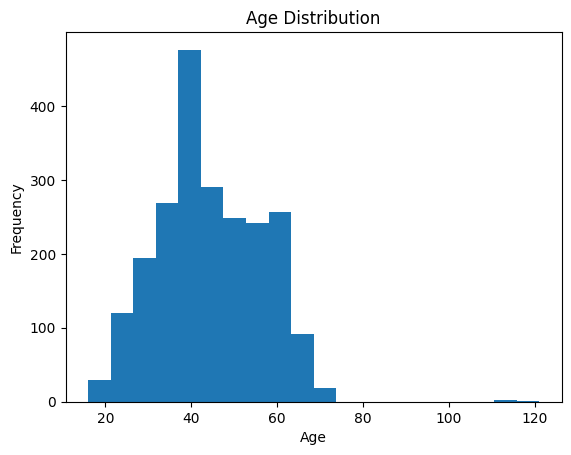

In [6]:
print(mdata['Age'].describe())
mdata['Age'].plot(kind='hist',bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Birth Year Removal of Outliers

count    2237.000000
mean       44.126062
std        11.739008
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

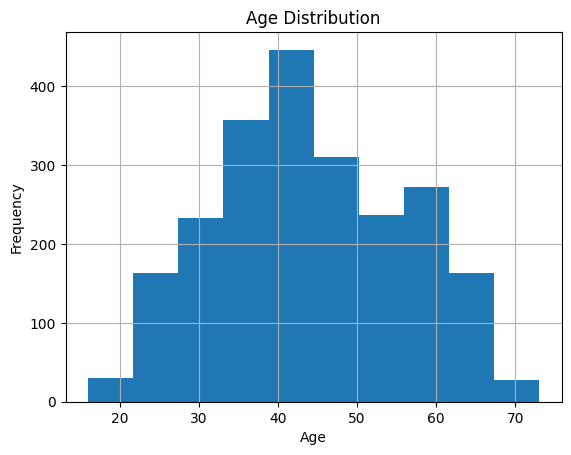

In [7]:
mdata_no_age_outliers = mdata.copy()
mdata_no_age_outliers = mdata[mdata['Age'] <= 100]
print(mdata_no_age_outliers['Age'].describe())
mdata_no_age_outliers['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Birth Year Imputations - using mean age

count    2240.000000
mean       44.125893
std        11.731142
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

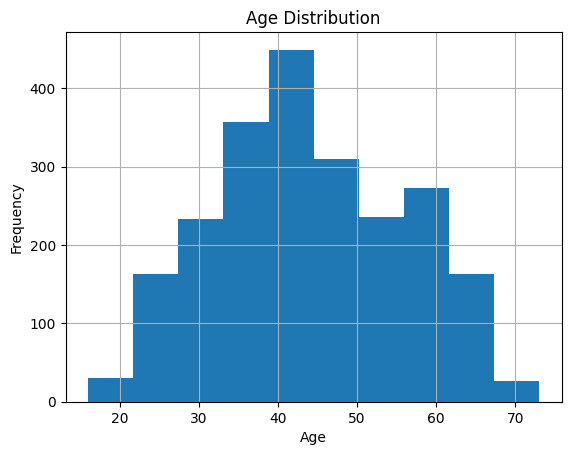

In [8]:
mdata_age_outliers_to_mean = mdata.copy()
mdata_age_outliers_to_mean.loc[mdata_age_outliers_to_mean['Age'] > 100, 'Age'] = int(mdata['Age'].mean())
print(mdata_age_outliers_to_mean['Age'].describe())
mdata_age_outliers_to_mean['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')


## Birth Year Imputations - using 1st quartile mean age

count    2240.000000
mean       44.115179
std        11.734907
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

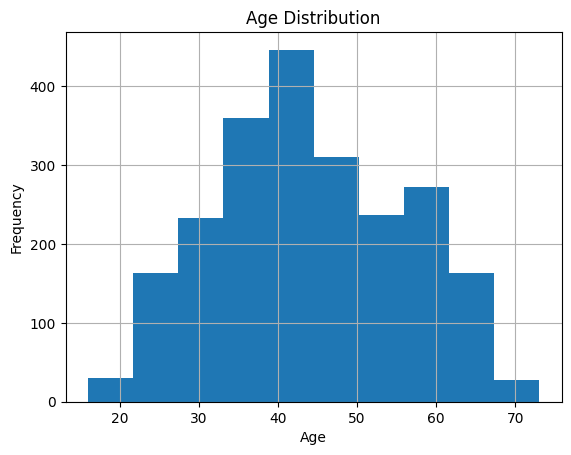

In [9]:
mdata_age_outliers_to_1st_quartile = mdata.copy()
mdata_age_outliers_to_1st_quartile.loc[mdata_age_outliers_to_1st_quartile['Age'] > 100, 'Age'] = int(mdata['Age'].quantile(0.25))
print(mdata_age_outliers_to_1st_quartile['Age'].describe())
mdata_age_outliers_to_1st_quartile['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Birth Year Imputations  - using 3rd quartile mean age

count    2240.000000
mean       44.139286
std        11.736700
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Age Distribution')

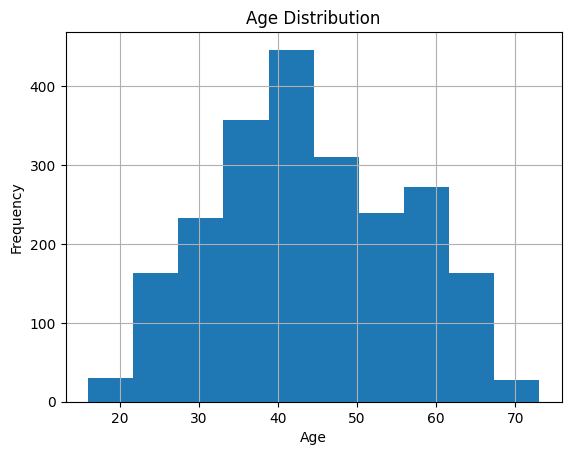

In [10]:
mdata_age_outliers_to_3rd_quartile = mdata.copy()
mdata_age_outliers_to_3rd_quartile.loc[mdata_age_outliers_to_3rd_quartile['Age'] > 100, 'Age'] = int(mdata['Age'].quantile(0.75))
print(mdata_age_outliers_to_3rd_quartile['Age'].describe())
mdata_age_outliers_to_3rd_quartile['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Using the mean age of the income quartile mean that comes closes to the income for each of the 3 age outliers

In [11]:

# Change income to float, can only be run once
mdata[' Income ']=mdata[' Income '].str.replace('$','').str.replace(',','').astype(float) 

# Replace missing values with 0
mdata[' Income '] = mdata[' Income '].fillna(0)

# Calcualte the quartiles for income
quartiles = mdata[' Income '].quantile([0.25,0.5,0.75])
print(quartiles)
print(mdata[' Income '].info())
print()
print(outliers)

# Calculate the mean income for each quartile
mean_income_1st_quartile = mdata[mdata[' Income '] <= quartiles[0.25]][' Income '].mean()
mean_income_2nd_quartile = mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])][' Income '].mean()
mean_income_3rd_quartile = mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])][' Income '].mean()
mean_income_4th_quartile = mdata[mdata[' Income '] > quartiles[0.75]][' Income '].mean()

# Store the means in a dictionary
quartile_means = {'q1':mean_income_1st_quartile, 'q2':mean_income_2nd_quartile, 'q3':mean_income_3rd_quartile, 'q4':mean_income_4th_quartile}

#Function to find closest quartile baed on income
def closest_quartile(income,quartile_means):
    closest_q = min(quartile_means, key=lambda x:abs(quartile_means[x]-income))
    return closest_q

# Itaration over age outliers and assign to closest quartile
for index, row in mdata[mdata['Age']>100].iterrows():
    income=row[' Income ']
    closest_q=closest_quartile(income,quartile_means)
    
    if closest_q == 'q1':
        mdata.at[index, 'Age']=int(mdata[mdata[' Income '] <= quartiles[0.25]]['Age'].mean())
    elif closest_q == 'q2':
        mdata.at[index, 'Age']=int(mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])]['Age'].mean())
    elif closest_q == 'q3':
        mdata.at[index, 'Age']=int(mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])]['Age'].mean())
    elif closest_q == 'q4':
        mdata.at[index, 'Age']=int(mdata[mdata[' Income '] > quartiles[0.75]]['Age'].mean())
    
    #print(mdata.loc[index])
    print()
print(mdata['Age'].describe())
    

0.25    34722.00
0.50    51075.00
0.75    68289.75
Name:  Income , dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name:  Income 
Non-Null Count  Dtype  
--------------  -----  
2240 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB
None

         ID  Year_Birth Education Marital_Status      Income   Kidhome  \
513   11004        1893  2n Cycle         Single  $60,182.00         0   
827    1150        1899       PhD       Together  $83,532.00         0   
2233   7829        1900  2n Cycle       Divorced  $36,640.00         1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
513          1     5/17/14       23         8  ...                  4   
827          0     9/26/13       36       755  ...                  1   
2233         0     9/26/13       99        15  ...                  5   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
513              0             0     

count    2240.000000
mean       44.127679
std        11.731313
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Age, dtype: float64

         ID  Year_Birth Education Marital_Status   Income   Kidhome  Teenhome  \
513   11004        1893  2n Cycle         Single   60182.0        0         1   
827    1150        1899       PhD       Together   83532.0        0         0   
2233   7829        1900  2n Cycle       Divorced   36640.0        1         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
513      5/17/14       23         8  ...                  4             0   
827      9/26/13       36       755  ...                  1             0   
2233     9/26/13       99        15  ...                  5             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
513              0             0             0             0         0   
827              0     

Text(0.5, 1.0, 'Age Distribution')

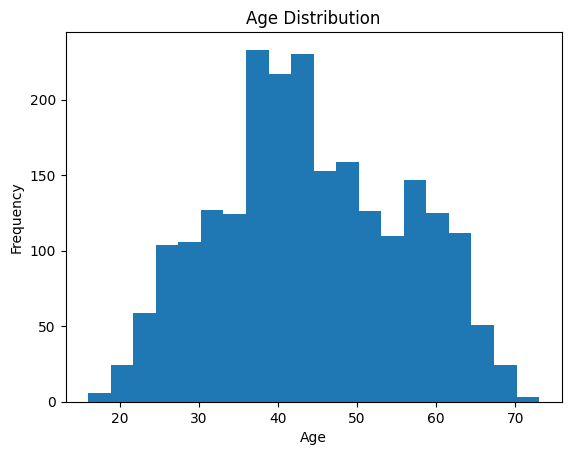

In [12]:
# Plot of the ages distribution of the customers with their ages modified to the closest quartile mean based on their income  
mdata['Age'].plot(kind='hist',bins=20)
print(mdata['Age'].describe())
print()
# Print rows with Birth Year equal to or or less than 1900
print(mdata[mdata['Year_Birth'] <= 1900])
print()
# Print the mean age of the customers whose income is in the first quartile, second quartile, third quartile and fourth quartile
print(mdata[mdata[' Income '] <= quartiles[0.25]]['Age'].mean())
print(mdata[(mdata[' Income '] > quartiles[0.25]) & (mdata[' Income '] <= quartiles[0.5])]['Age'].mean())
print(mdata[(mdata[' Income '] > quartiles[0.5]) & (mdata[' Income '] <= quartiles[0.75])]['Age'].mean())
print(mdata[mdata[' Income '] > quartiles[0.75]]['Age'].mean())
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

## Conclusion for dealing with the 'AGE' outliers

### As we can see, all foms for dealing with the outliers has very little impact on the age distribution of the dataset
### The mean remains approximately 44.13 for all methods.
### This means that because the distributions of age are very similar among any of the choices for dealing with the age outliers, our conclusions for any age related questions should be statisttically close enough to where we can be confident that if we choose any of the methods to deal with the outliers, we won't be introducing any skweness or falsity in our conclusion
### In order to keep as much of the data to answer questions that involve age and implications on income and shopping behavior, we will assign mean ages based on income quartile for the outliers, as this keeps the data context-sensitive and minimizes potential skewness or bias. 


# Missing Income Imputations


In [13]:
# imputate the missing values by looking at education and marital status and assume that the customers with similar education and marital status make the same yearly income, on average.
# Group by Education and Marital Status and calculate the mean income for each group
grouped_income_by_education_and_marital_status = mdata.groupby(['Education','Marital_Status'])[' Income '].mean()

# Iterate over the missing income rows and assign the mean income of the group to which the customer belongs
for index, row in missing_income_rows.iterrows():
    education = row['Education']
    marital_status = row['Marital_Status']
    mean_income = grouped_income_by_education_and_marital_status[education][marital_status]
    mdata.at[index, ' Income '] = mean_income

# Check if there are still missing values
print(mdata.isnull().sum())


print(mdata.loc[missing_income_rows.index])


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
dtype: int64
         ID  Year_Birth   Education Marital_Status       Income   Kidhome  \
134    8996        1957         PhD        Married  57532.427083        2   
262    1994        1983  Graduation        Married  50330.972286        1   
394    3769        1972        

# We will now look at other outliers that could affect our conclusions or answers to our project questions, namely:
- income outliers
- total number of kids outliers
- total purchases outliers
- outliers for purchases on web
- outliers for purchases through catalog
- outliers for purchases at store
- US based purchases outliers
- Recency outliers
- Product specific outliers (wines,fruits,meats,fish,sweets, and gold )
- Complaint frequency outliers

## Income outliers


count      2240.000000
mean      52235.887961
std       25040.043654
min        1730.000000
25%       35538.750000
50%       51301.000000
75%       68289.750000
max      666666.000000
Name:  Income , dtype: float64


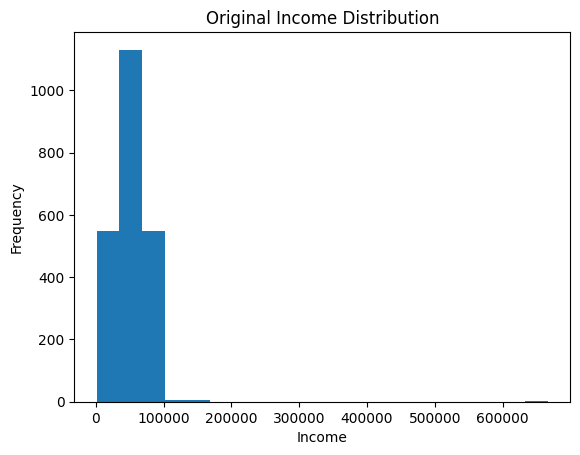

In [36]:
# distribution of income vs frequency   
mdata[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Original Income Distribution')

print(mdata[' Income '].describe())

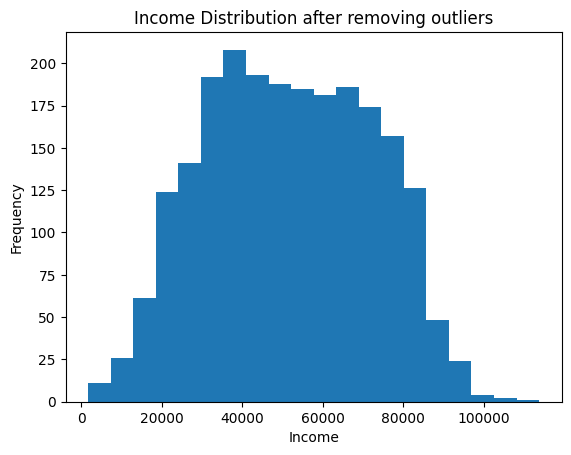

count      2232.000000
mean      51628.832004
std       20604.164172
min        1730.000000
25%       35434.750000
50%       51171.500000
75%       68118.000000
max      113734.000000
Name:  Income , dtype: float64


In [37]:
# We will now remove income outliers using the z-score method
z_scores = (mdata[' Income '] - mdata[' Income '].mean()) / mdata[' Income '].std()
mdata_no_income_outliers = mdata.copy()
mdata_no_income_outliers = mdata_no_income_outliers[(z_scores >= -3) & (z_scores <= 3)]
#plot the income distribution after removing outliers
mdata_no_income_outliers[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution after removing outliers')
plt.show()
print(mdata_no_income_outliers[' Income '].describe())

In [43]:
# we will now calculate if there is any statistical significance between the dataset with income outliers and the dataset without income outliers
# using the derivation of the p-value from the t-statistic. A p-value less than 0.05 indicates that there is a significant difference between the two datasets, otherwise there is no significant difference and the two datasets can be considered to be practically the same.
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(mdata[' Income '], mdata_no_income_outliers[' Income '])
print(f'The t-statistic is {t_stat} and the p-value is {p_value}')
print()




The t-statistic is 0.8850690827341898 and the p-value is 0.3761669792300474



## Since the p-value is 0.376 which is greater than 0.05, we see that there is no statistical significance between the dataset with income outliers and the dataset without income outliers
## In essence, we could use either dataset. But since the dataset without income outliers gives us a more normal distribution we'll use the dataset without income outliers. This choice will give us the following advantages:
1. Improved Robustness and Reliability:
Statistical tests and models often assume normality in the data. Using a dataset that approximates a normal distribution ensures that these assumptions are met more closely, leading to more reliable and valid results.

2. Better Model Performance:
Many machine learning algorithms and statistical models perform better with normally distributed data. The presence of outliers can skew results, affect model accuracy, and lead to overfitting or underfitting. A more normally distributed dataset helps in building more robust and generalizable models.

3. Clearer and More Accurate Visualizations:
Visual representations such as histograms, box plots, and scatter plots are more interpretable and accurate when the data is normally distributed. This clarity can aid in better understanding and communicating the insights derived from the data.

4. Minimized Influence of Extreme Values:
By capping extreme values, we reduce the undue influence of outliers that can disproportionately affect the mean and other summary statistics. This leads to more representative measures of central tendency and variability.

5. Enhanced Statistical Testing:
Many statistical tests, including t-tests and ANOVA, rely on the assumption of normality. A dataset that meets this assumption is less likely to violate the conditions necessary for these tests, resulting in more valid p-values and confidence intervals.

6. Consistent Decision-Making:
Using a dataset with reduced variability and fewer extreme values can lead to more consistent and reliable decision-making. This is crucial for hypothesis testing and making business decisions based on the data.



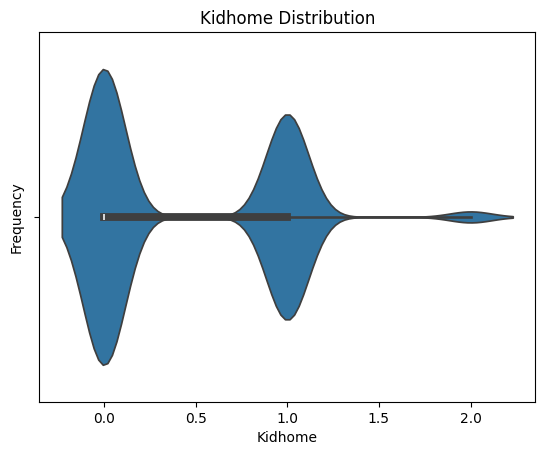

count    2240.000000
mean        0.444196
std         0.538398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64



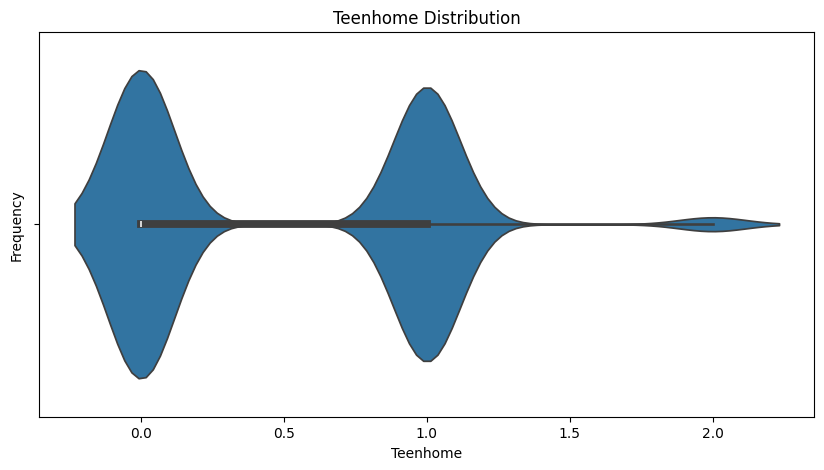

count    2240.000000
mean        0.506250
std         0.544538
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64



In [50]:
## We will now check the outliers for the following:


## set figure size
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]

## total number of kids vs frequency violin plot
sns.violinplot(x=mdata['Kidhome'])
plt.xlabel('Kidhome')
plt.ylabel('Frequency')
plt.title('Kidhome Distribution')
plt.show()
print(mdata['Kidhome'].describe())
print()

# set figure size
plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]

# total number of teens vs frequency violin plot
sns.violinplot(x=mdata['Teenhome'])
plt.xlabel('Teenhome')
plt.ylabel('Frequency')
plt.title('Teenhome Distribution')
plt.show()
print(mdata['Teenhome'].describe())
print()



Text(0.5, 1.0, 'Income based on Education')

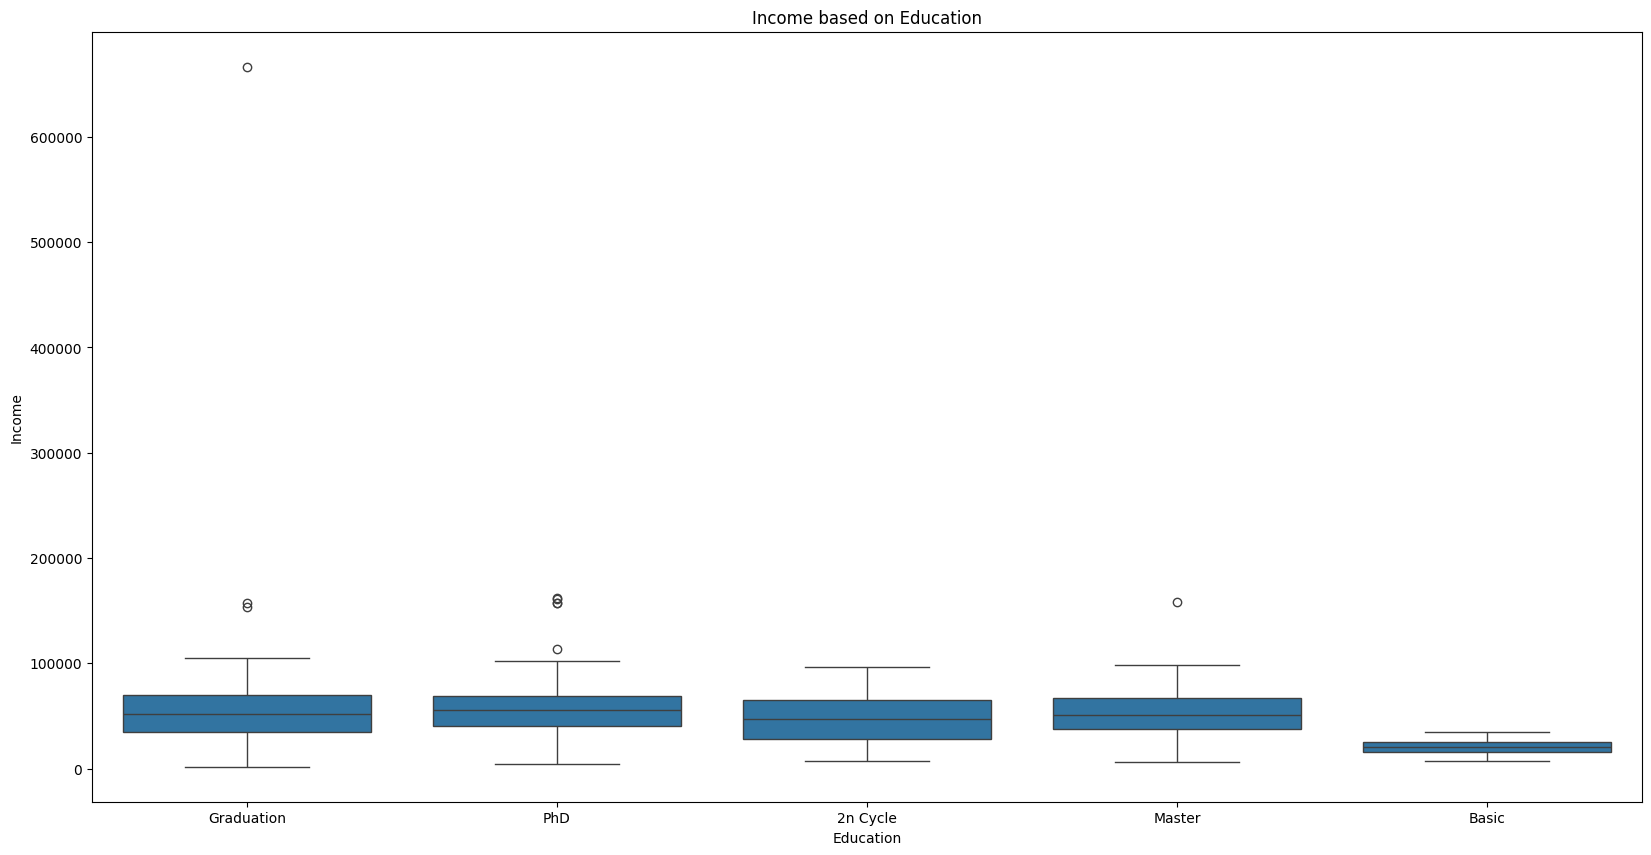

In [14]:
# Income boxplot based on Education
plt.figure(figsize=(20,10))
sns.boxplot(x='Education', y=' Income ', data=mdata)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income based on Education')


Text(0.5, 1.0, 'Income based on Marital Status')

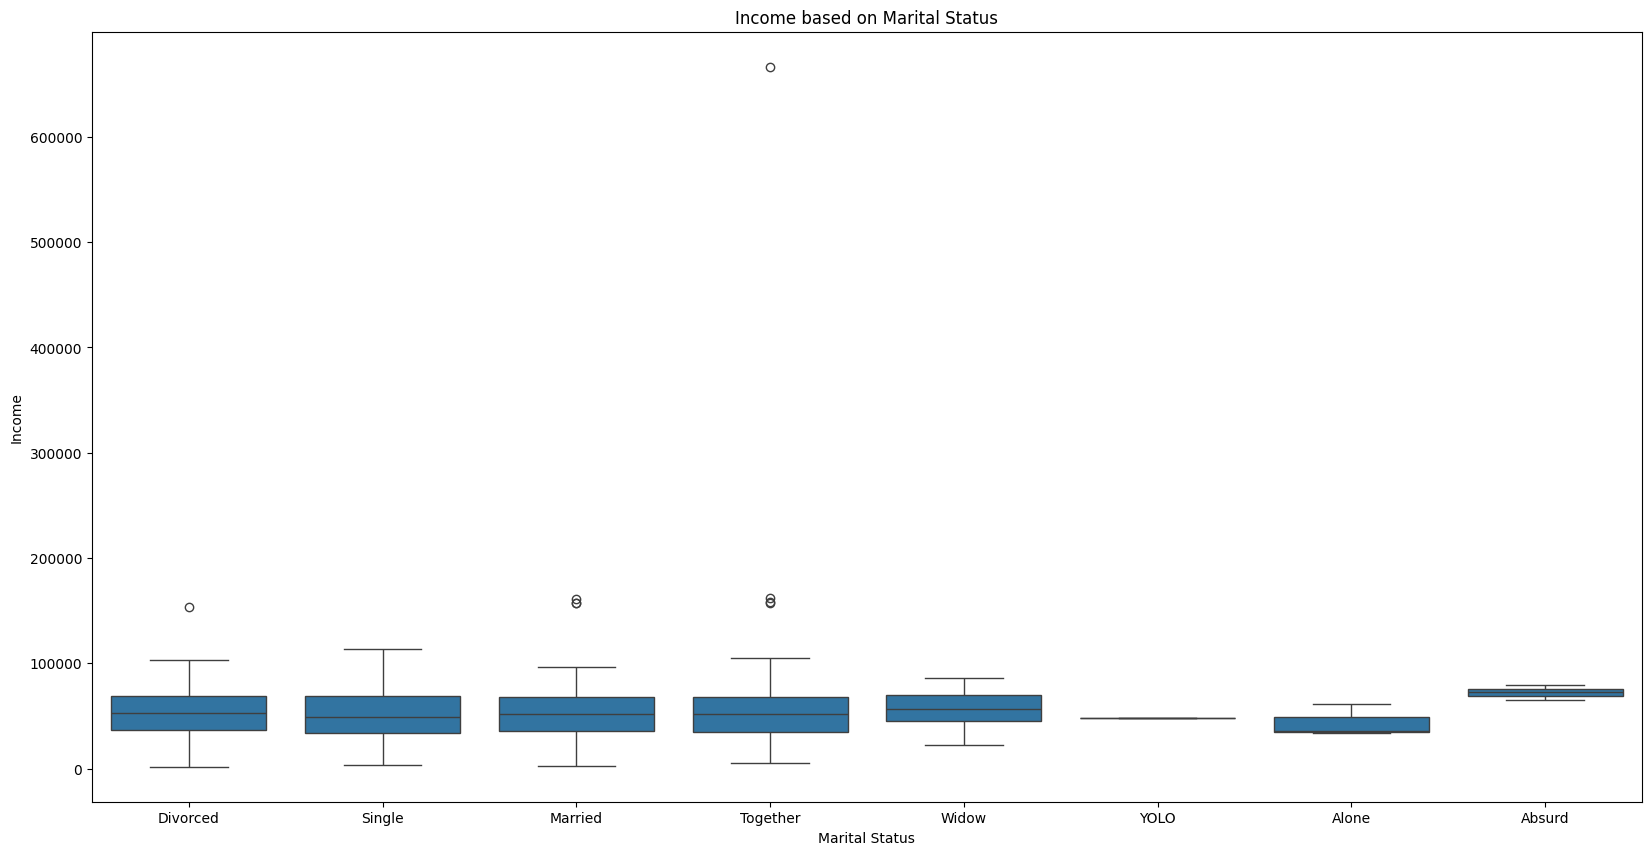

In [15]:
# Income boxplot based on Marital Status
plt.figure(figsize=(20,10))
sns.boxplot(x='Marital_Status', y=' Income ', data=mdata)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Income based on Marital Status')


          count          mean           std      min           25%      50%  \
Kidhome                                                                       
0        1293.0  61695.277159  19570.857683   1730.0  50330.972286  63915.0   
1         899.0  39296.869870  26415.342865   2447.0  28007.500000  36975.0   
2          48.0  39760.617777  13626.356530  15072.0  30278.000000  36326.5   

                  75%       max  
Kidhome                          
0        75236.000000  160803.0  
1        46756.500000  666666.0  
2        50186.919643   71427.0  

           count          mean           std     min      25%      50%  \
Teenhome                                                                 
0         1158.0  51873.970306  31398.453455  1730.0  29032.5  45802.5   
1         1030.0  52480.331254  15593.625905  4023.0  42261.0  53186.5   
2           52.0  55453.658196  15500.567828  7144.0  46681.0  54655.5   

               75%       max  
Teenhome                      


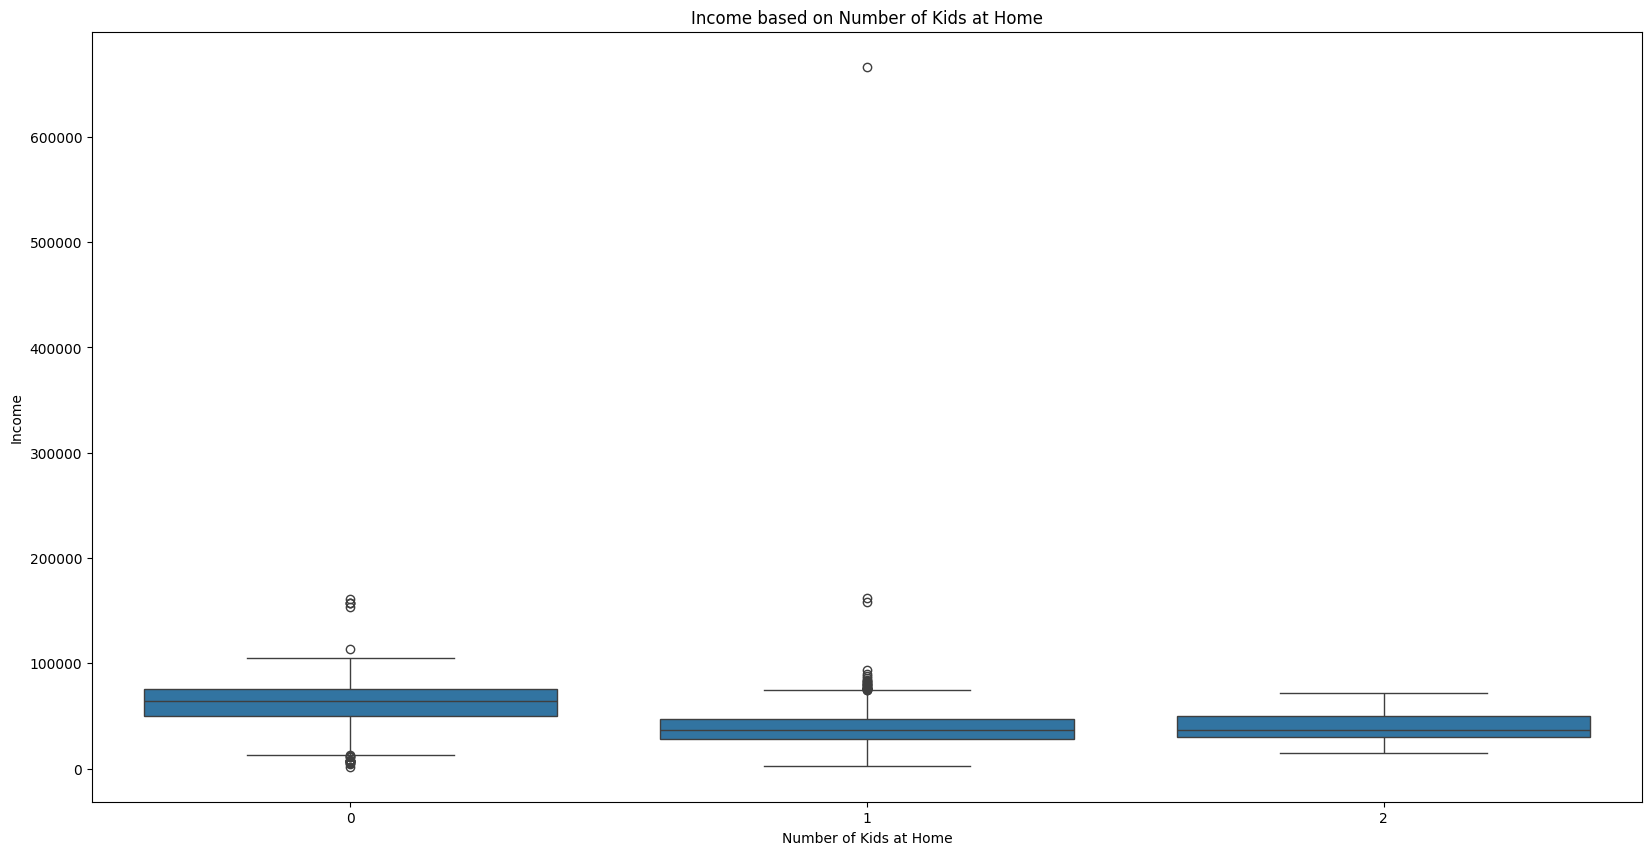

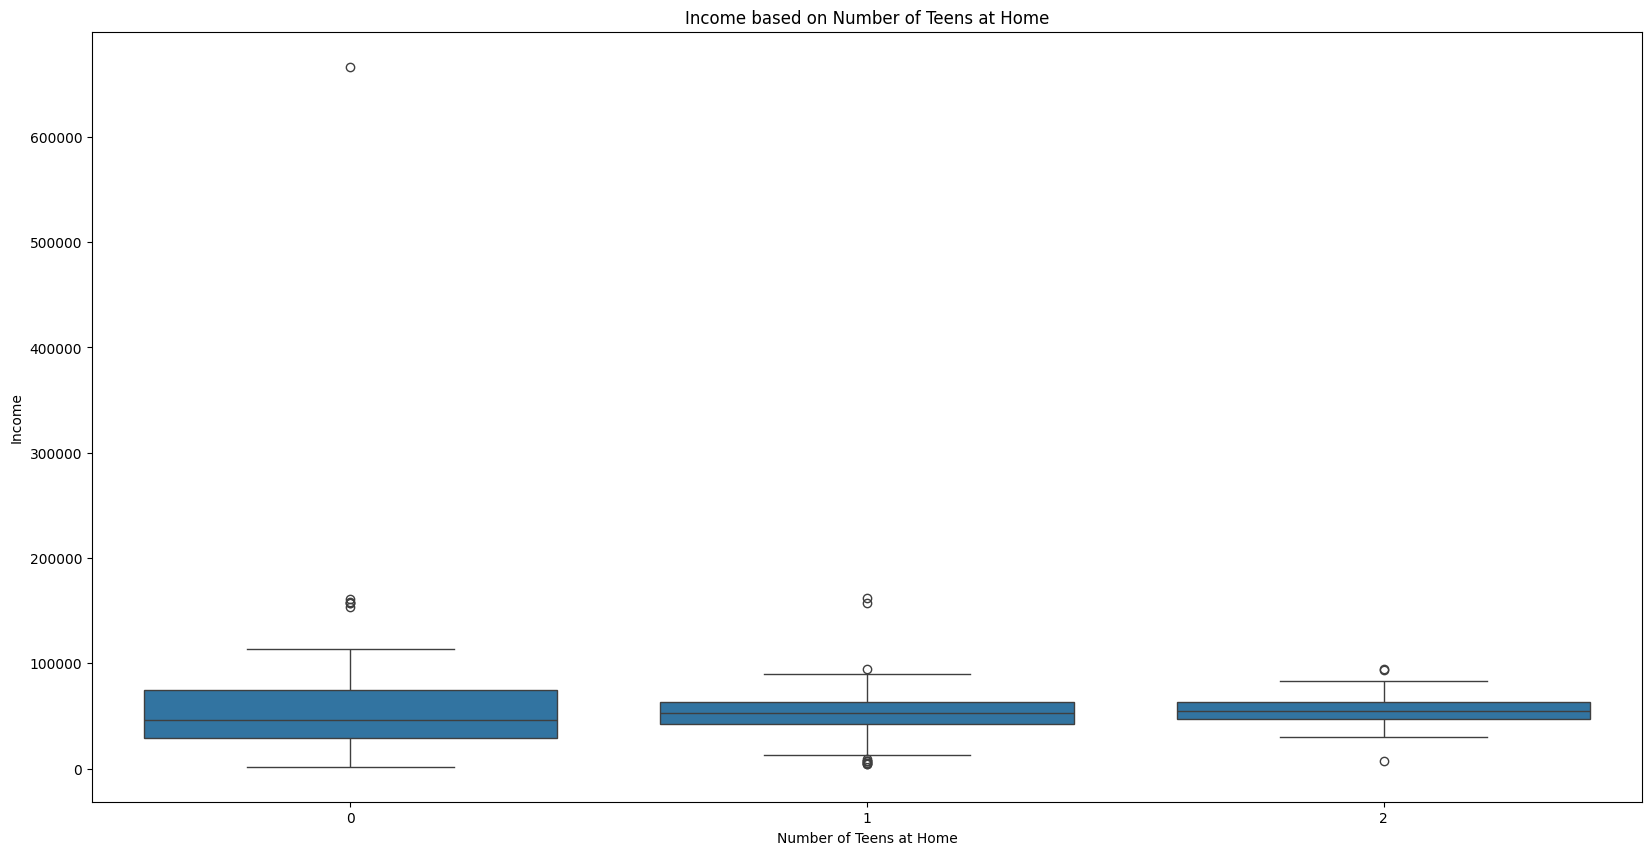

In [16]:
# income boxplot based on number of kids at home
plt.figure(figsize=(20,10))
sns.boxplot(x='Kidhome', y=' Income ', data=mdata)
plt.xlabel('Number of Kids at Home')
plt.ylabel('Income')
plt.title('Income based on Number of Kids at Home')
# print mean for each number of kids at home
print(mdata.groupby('Kidhome')[' Income '].describe())
print()
# income boxplot based on number of teens at home
plt.figure(figsize=(20,10))
sns.boxplot(x='Teenhome', y=' Income ', data=mdata)
plt.xlabel('Number of Teens at Home')
plt.ylabel('Income')
plt.title('Income based on Number of Teens at Home')
# print mean for each number of teens at home
print(mdata.groupby('Teenhome')[' Income '].describe())
print()



Text(0.5, 1.0, 'Income based on Country')

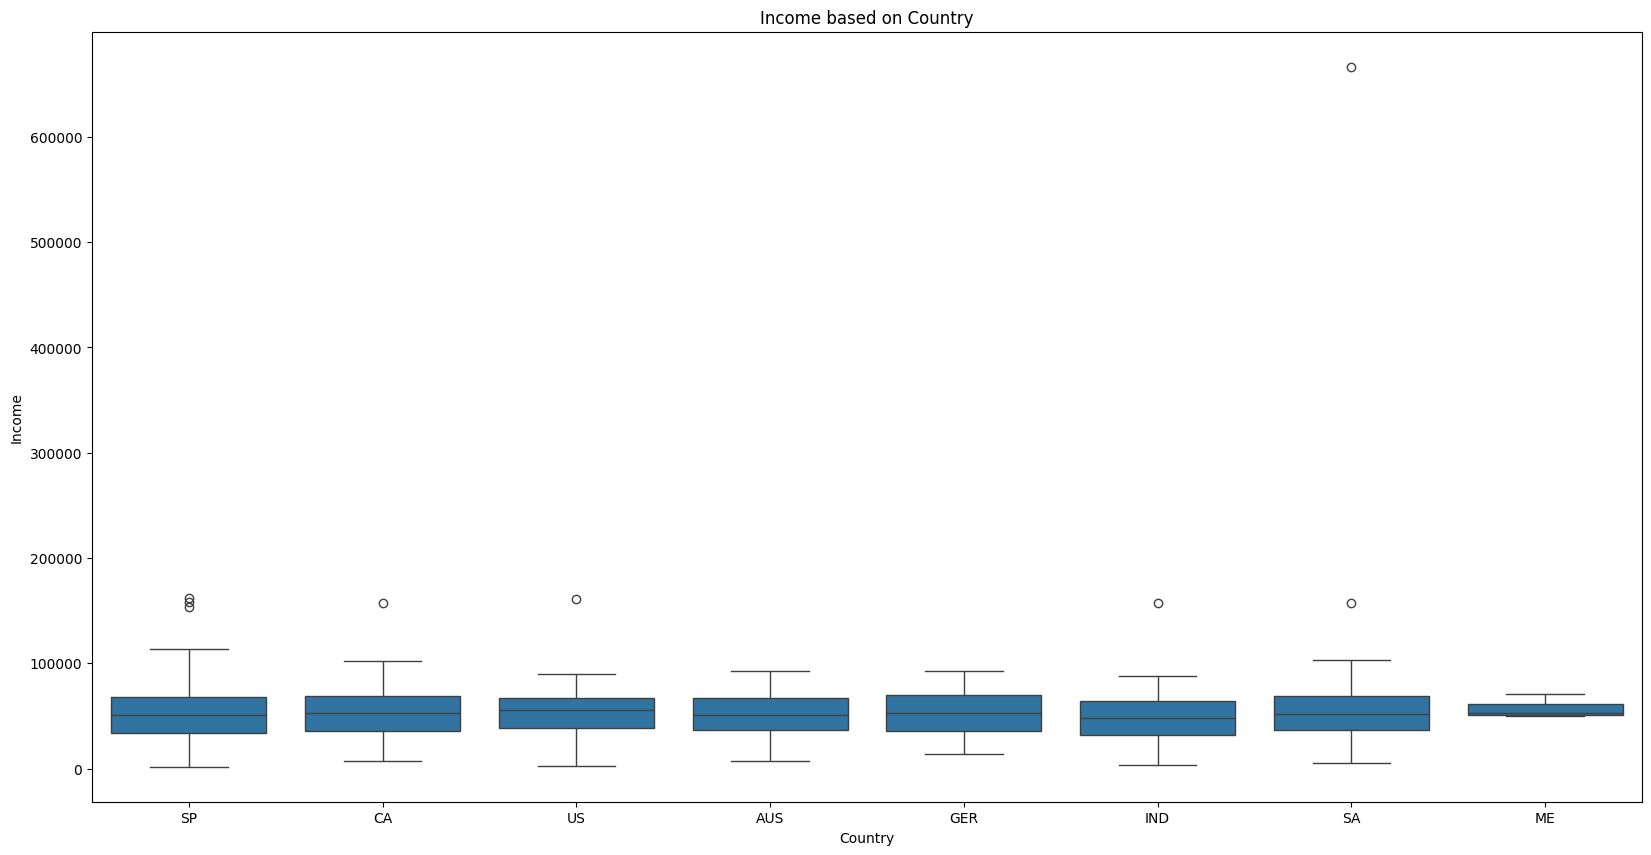

In [17]:
# income boxplot based on country
plt.figure(figsize=(20,10))
sns.boxplot(x='Country', y=' Income ', data=mdata)
plt.xlabel('Country')
plt.ylabel('Income')
plt.title('Income based on Country')


Education
2n Cycle      47627.800861
Basic         20306.259259
Graduation    52700.466519
Master        52889.203455
PhD           56133.696322
Name:  Income , dtype: float64

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51724.914884
Single      50991.849535
Together    53216.101804
Widow       56443.282468
YOLO        48432.000000
Name:  Income , dtype: float64

Country
AUS    51797.401674
CA     53057.191789
GER    52881.108345
IND    48982.192982
ME     57680.333333
SA     54830.816024
SP     51562.113423
US     53163.666095
Name:  Income , dtype: float64

Kidhome
0    61695.277159
1    39296.869870
2    39760.617777
Name:  Income , dtype: float64

mean of the entire income column:  52235.88796108595


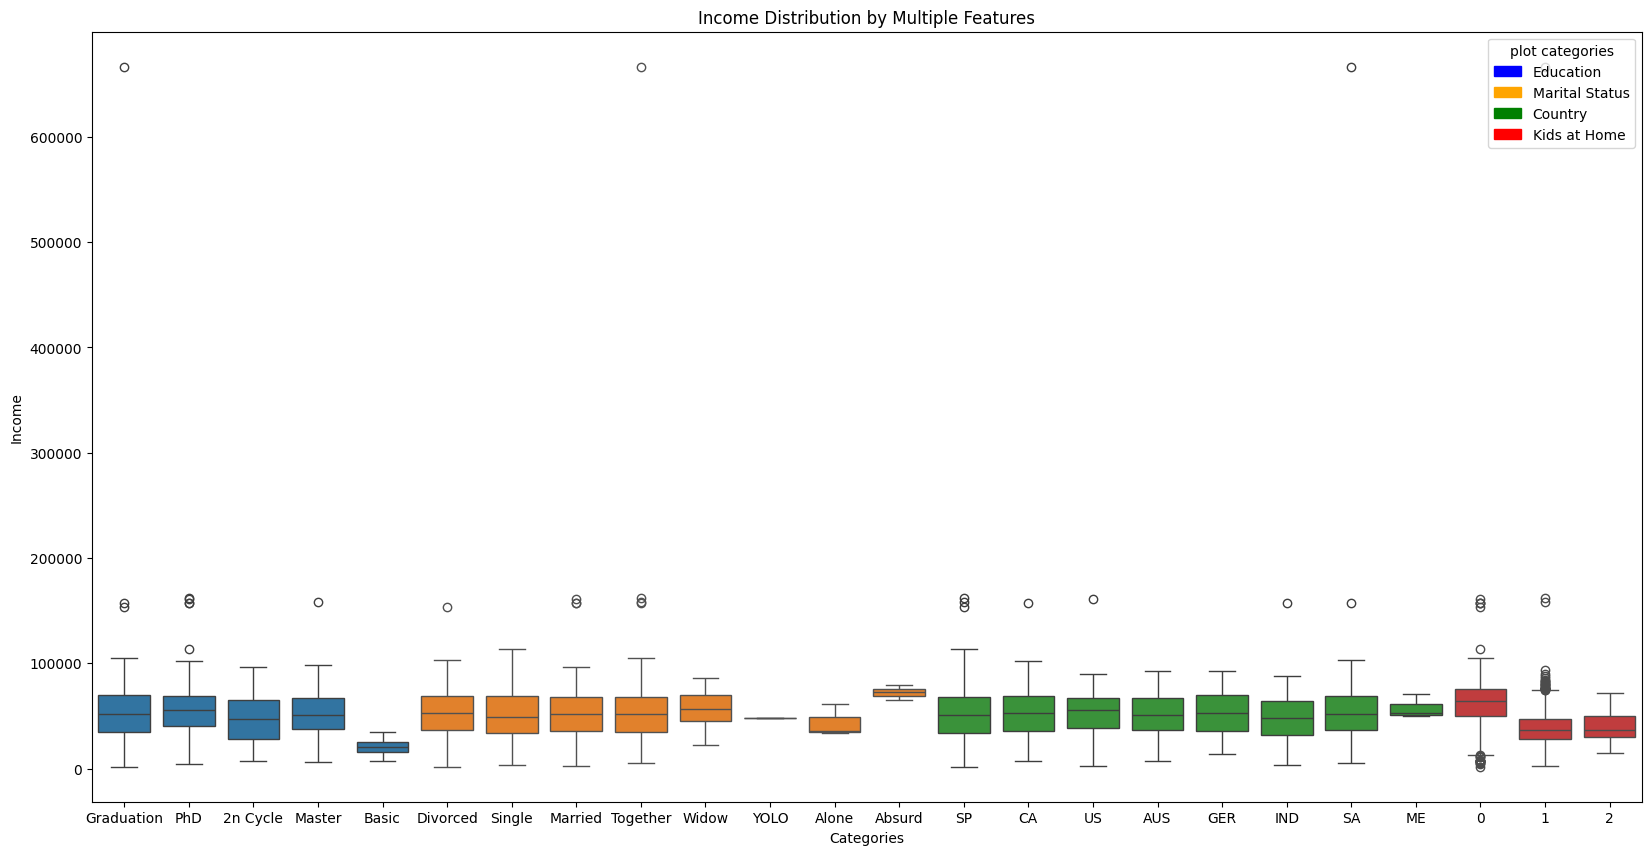

In [18]:
import matplotlib.patches as mpatches
plt.figure(figsize=(20,10))
sns.boxplot(x='Education', y=' Income ', data=mdata)
sns.boxplot(x='Marital_Status', y=' Income ', data=mdata)
sns.boxplot(x='Country', y=' Income ', data=mdata)
sns.boxplot(x='Kidhome', y=' Income ', data=mdata)
# Set the titles and labels
plt.xlabel('Categories')
plt.ylabel('Income')
plt.title('Income Distribution by Multiple Features')
# Create custom legend patches
legend_patches = [
    mpatches.Patch(color='blue', label='Education'),
    mpatches.Patch(color='orange', label='Marital Status'),
    mpatches.Patch(color='green', label='Country'),
    mpatches.Patch(color='red', label='Kids at Home')
]

# Add the custom legend
plt.legend(handles=legend_patches, loc='upper right', title='plot categories')

# print mean for each category
print(mdata.groupby('Education')[' Income '].mean())
print()
print(mdata.groupby('Marital_Status')[' Income '].mean())
print()
print(mdata.groupby('Country')[' Income '].mean())
print()
print(mdata.groupby('Kidhome')[' Income '].mean())
print()
# print the mean for the entire income column
print('mean of the entire income column: ',mdata[' Income '].mean())



count      2228.000000
mean      51576.268417
std       20493.139360
min        2447.000000
25%       35434.750000
50%       51144.500000
75%       68098.250000
max      102160.000000
Name:  Income , dtype: float64

mean of the entire income column: 
 count      2240.000000
mean      52235.887961
std       25040.043654
min        1730.000000
25%       35538.750000
50%       51301.000000
75%       68289.750000
max      666666.000000
Name:  Income , dtype: float64


Text(0.5, 1.0, 'Income Distribution')

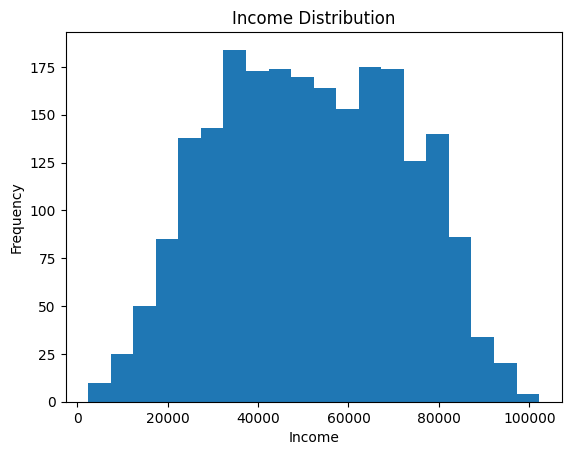

In [19]:
# We will now remove income outliers based on Education using the z-score method
from scipy.stats import zscore
capped_income_mdata = mdata.copy()
z_scores = zscore(capped_income_mdata[' Income '])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)
capped_income_mdata = capped_income_mdata[filtered_entries]
print(capped_income_mdata[' Income '].describe())
print()
# print the mean for the entire income column
print('mean of the entire income column: \n',mdata[' Income '].describe())
# Plot histogram of capped income
capped_income_mdata[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')



Text(0.5, 1.0, 'Income Distribution')

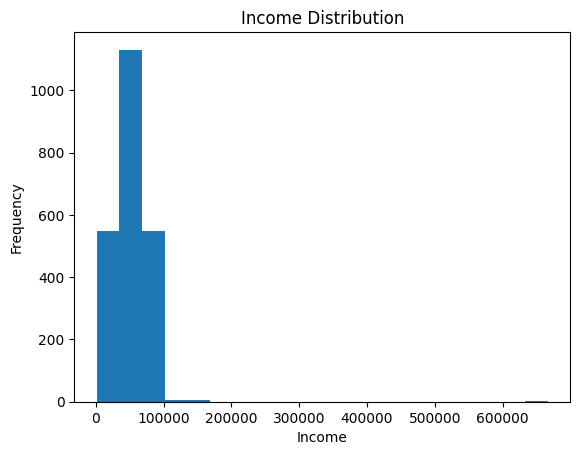

In [20]:
# plot histogram of original income
mdata[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')

Text(0.5, 1.0, 'Income based on Education')

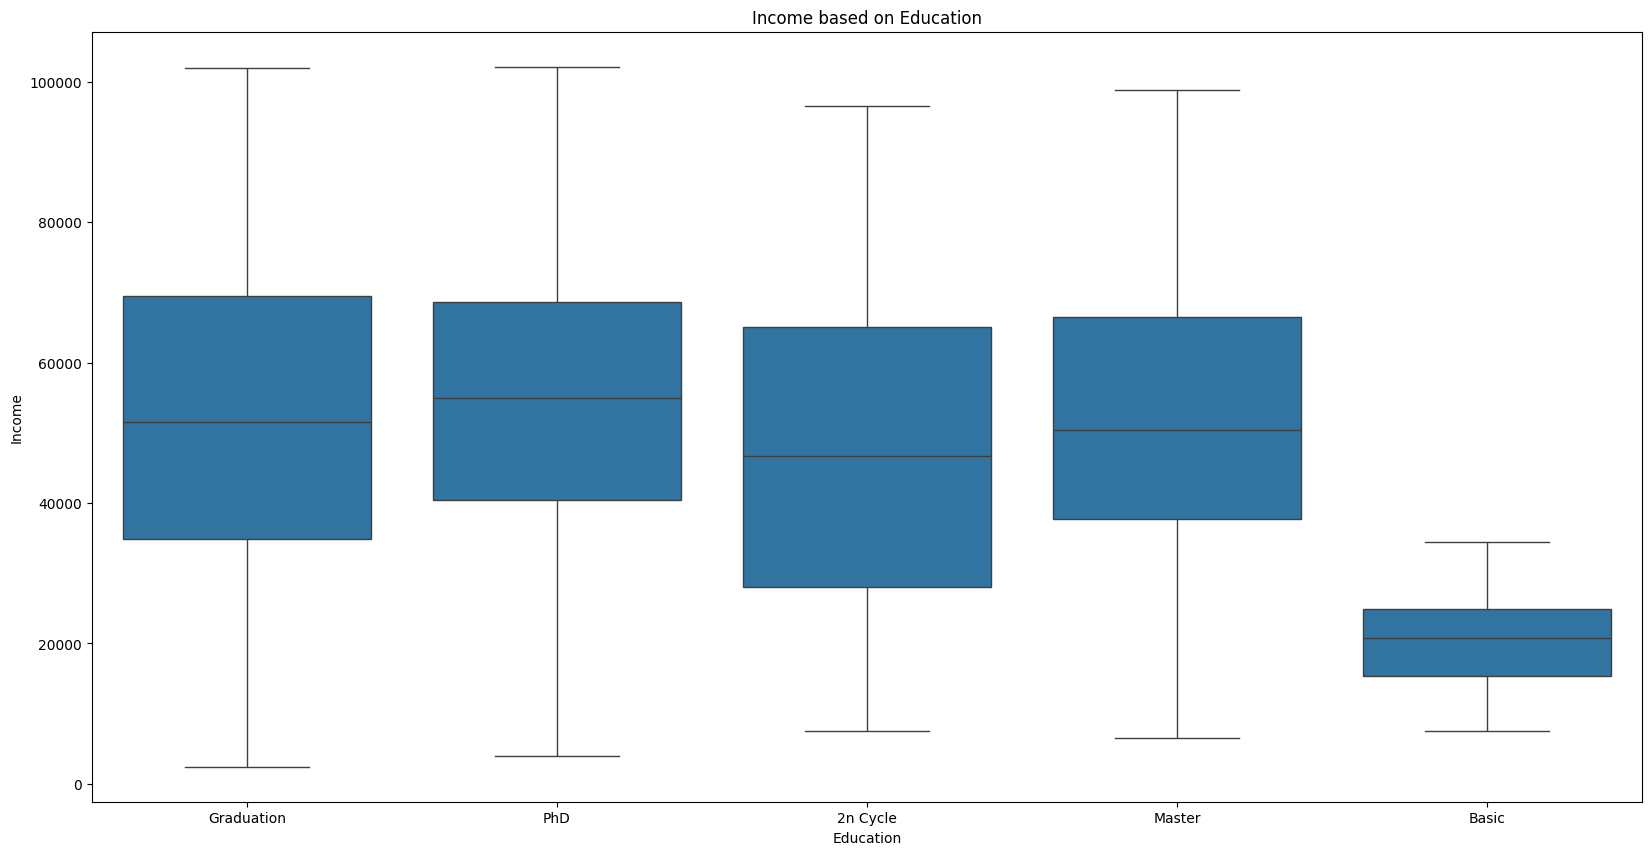

In [21]:
# Capped Income boxplot based on Education
plt.figure(figsize=(20,10))
sns.boxplot(x='Education', y=' Income ', data=capped_income_mdata)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income based on Education')

In [33]:
from scipy.stats import ttest_ind

# Assuming mdata_capped and mdata_full are your DataFrames with capped data and full data respectively
income_capped = capped_income_mdata[' Income ']
income_full = mdata[' Income ']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(income_capped, income_full)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

print()
print('Income Capped')
print(income_capped.describe())
print()
print('Income Full')
print(income_full.describe())
print()
print('Since the T-statistic is -0.96 and the p-value is 0.34, we fail to reject the null hypothesis that the two samples have the same mean. This means that the capped income data is not significantly different from the full income data.')

T-Statistic: -0.9632755522048397
P-Value: 0.33546141206056246

Income Capped
count      2228.000000
mean      51576.268417
std       20493.139360
min        2447.000000
25%       35434.750000
50%       51144.500000
75%       68098.250000
max      102160.000000
Name:  Income , dtype: float64

Income Full
count      2240.000000
mean      52235.887961
std       25040.043654
min        1730.000000
25%       35538.750000
50%       51301.000000
75%       68289.750000
max      666666.000000
Name:  Income , dtype: float64


Text(0.5, 1.0, 'Income based on Marital Status')

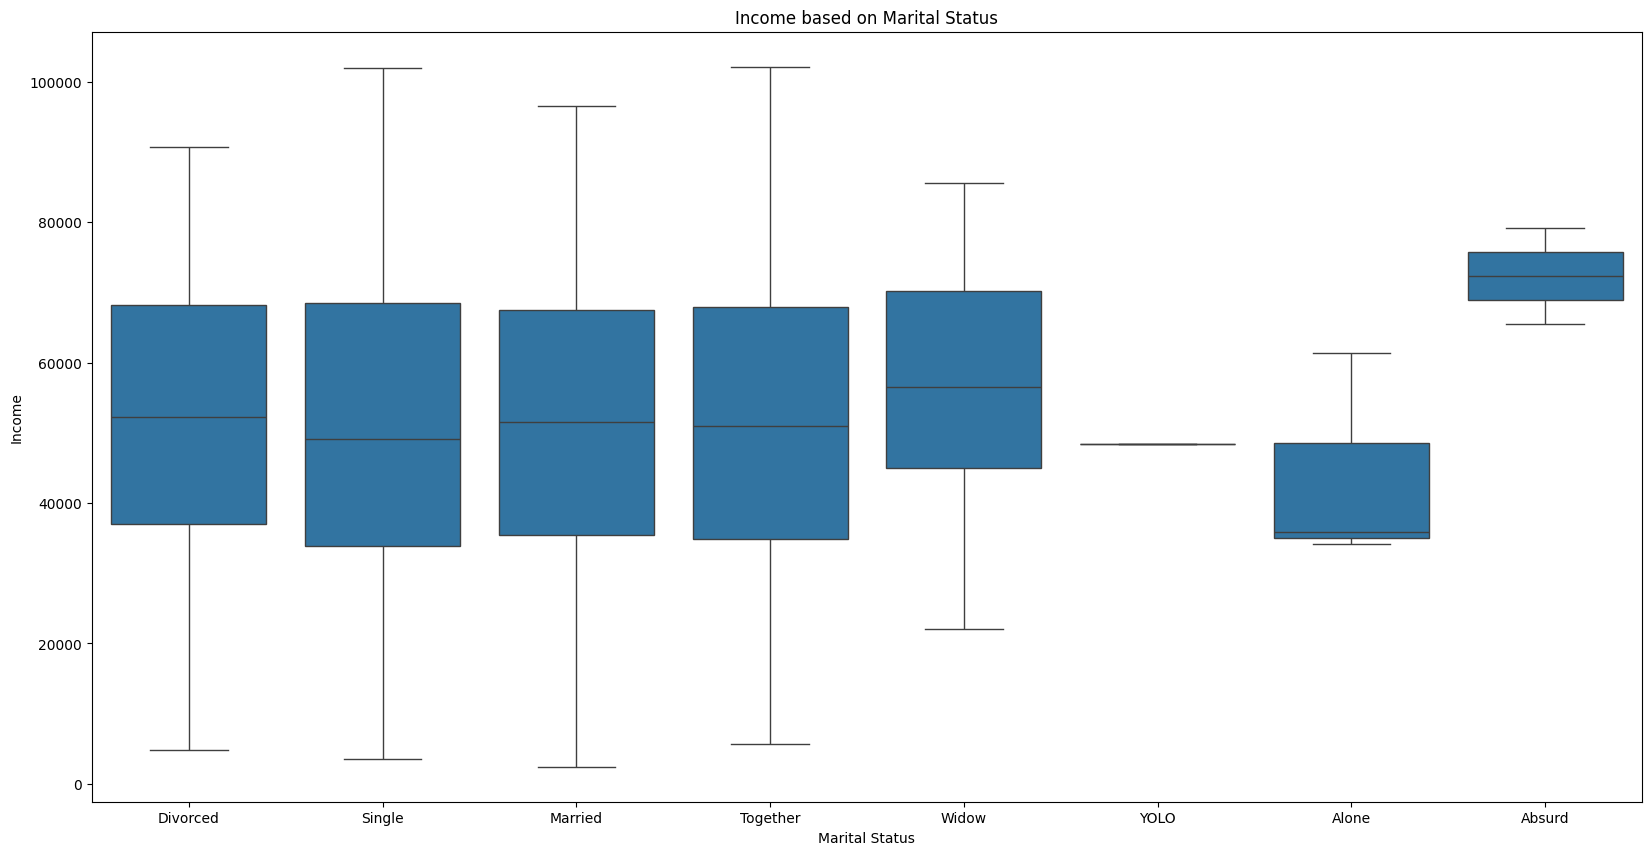

In [23]:
# Capped income boxplot based on Marital Status
plt.figure(figsize=(20,10))
sns.boxplot(x='Marital_Status', y=' Income ', data=capped_income_mdata)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Income based on Marital Status')


          count          mean           std      min           25%      50%  \
Kidhome                                                                       
0        1284.0  61263.494055  18499.486528   4428.0  50323.229215  63841.0   
1         896.0  38327.109389  15059.745063   2447.0  27941.750000  36958.0   
2          48.0  39760.617777  13626.356530  15072.0  30278.000000  36326.5   

                  75%       max  
Kidhome                          
0        75042.000000  102160.0  
1        46433.000000   93404.0  
2        50186.919643   71427.0  

           count          mean           std     min      25%      50%  \
Teenhome                                                                 
0         1148.0  50778.078933  24596.049629  2447.0  28922.0  45353.5   
1         1028.0  52271.499214  14870.787843  4023.0  42240.0  53163.0   
2           52.0  55453.658196  15500.567828  7144.0  46681.0  54655.5   

               75%       max  
Teenhome                      


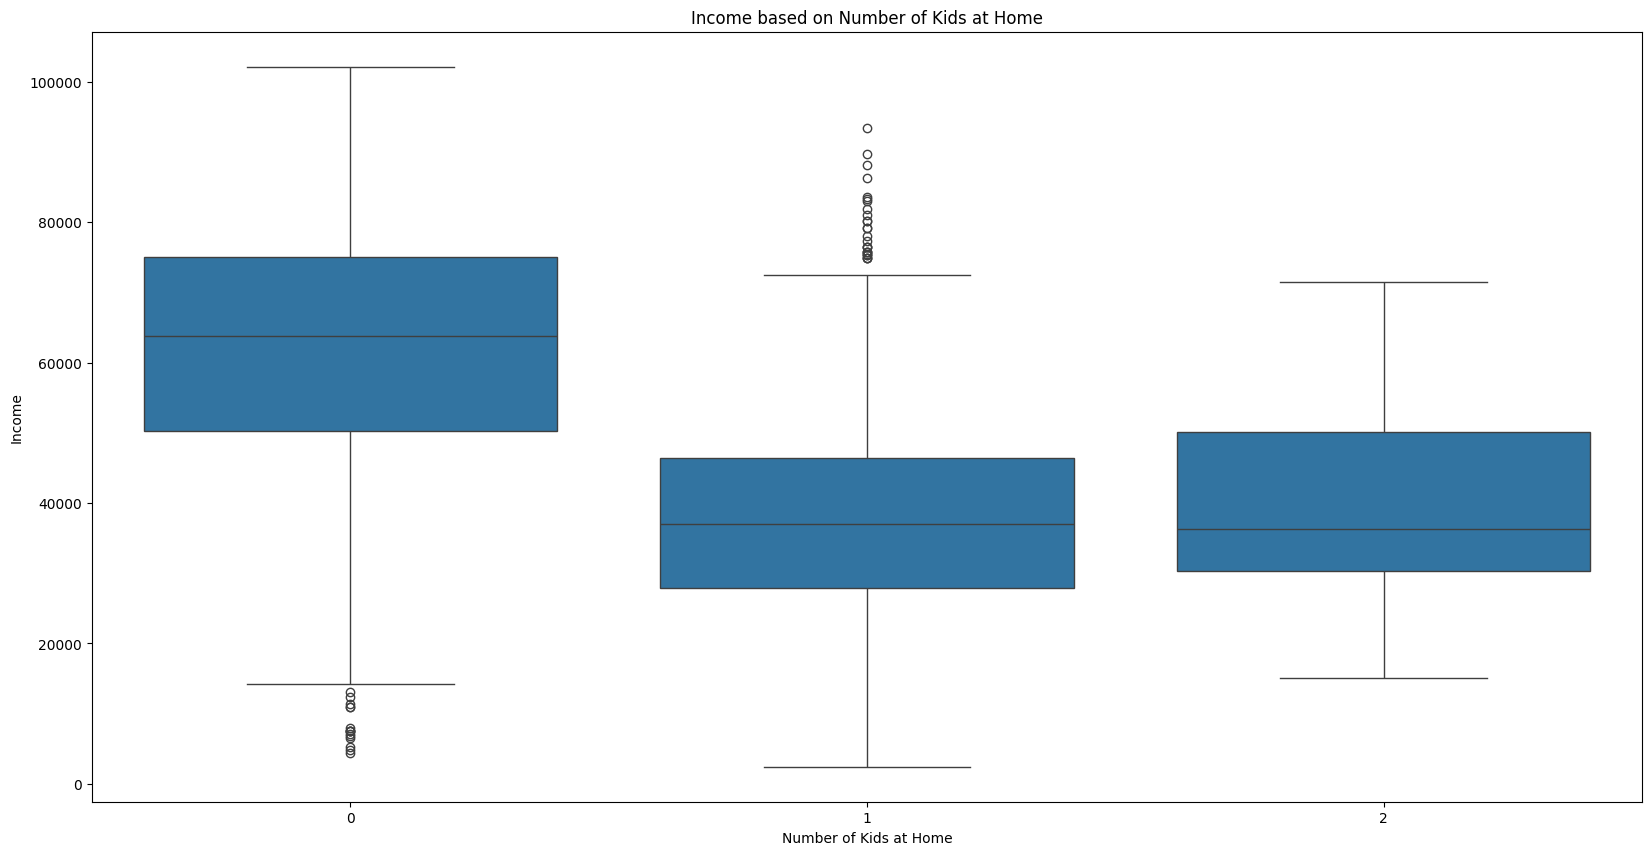

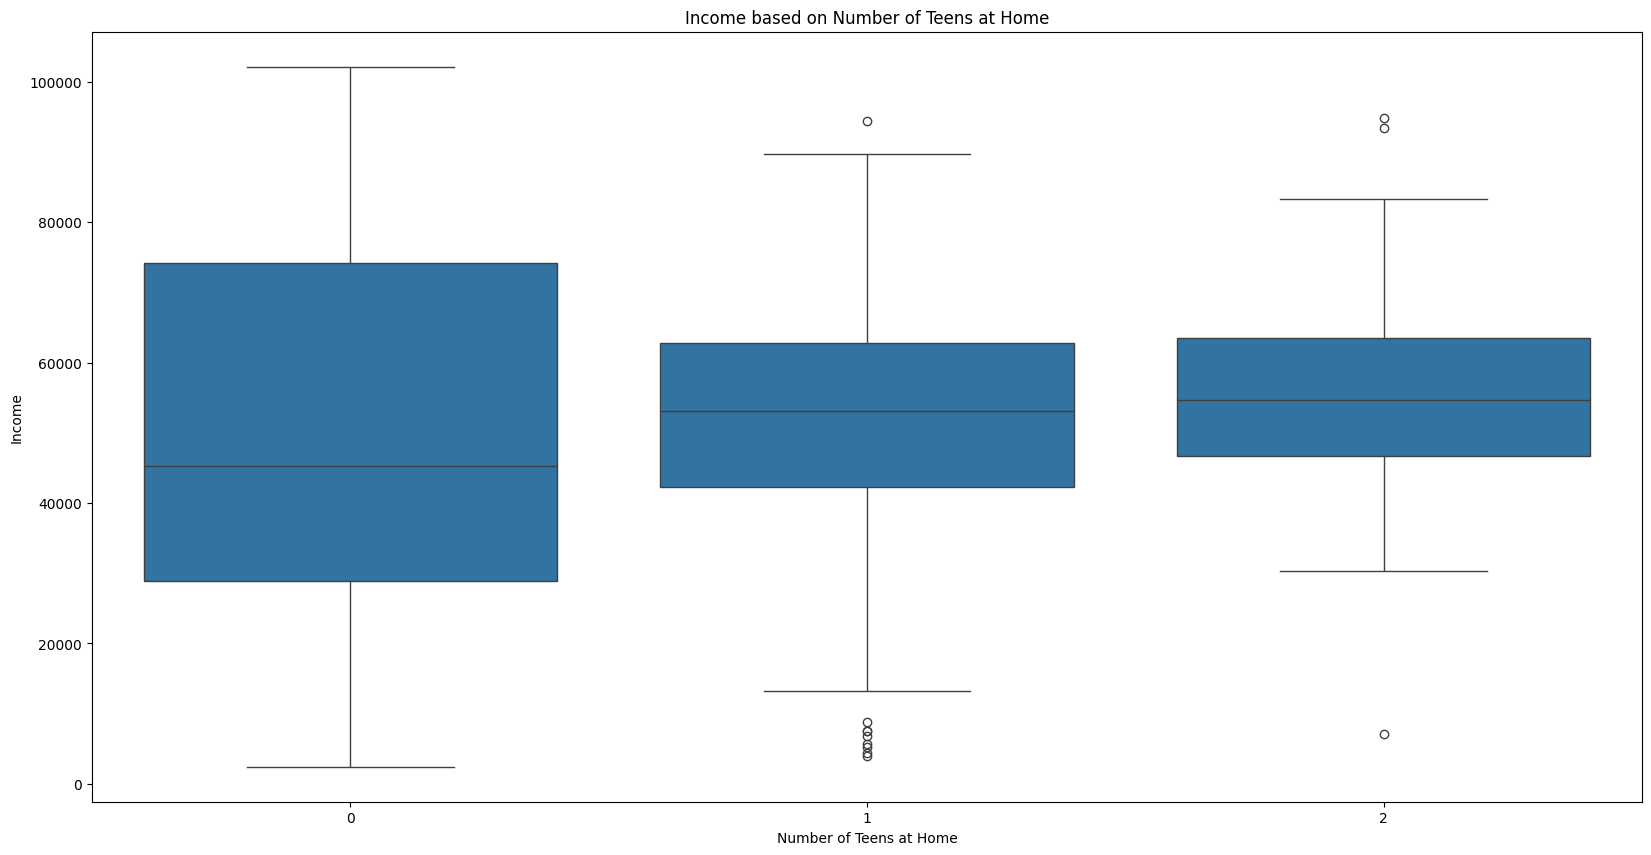

In [24]:
# Capped income boxplot based on number of kids at home
plt.figure(figsize=(20,10))
sns.boxplot(x='Kidhome', y=' Income ', data=capped_income_mdata)
plt.xlabel('Number of Kids at Home')
plt.ylabel('Income')
plt.title('Income based on Number of Kids at Home')
# print mean for each number of kids at home
print(capped_income_mdata.groupby('Kidhome')[' Income '].describe())
print()
# Capped income boxplot based on number of teens at home
plt.figure(figsize=(20,10))
sns.boxplot(x='Teenhome', y=' Income ', data=capped_income_mdata)
plt.xlabel('Number of Teens at Home')
plt.ylabel('Income')
plt.title('Income based on Number of Teens at Home')
print(capped_income_mdata.groupby('Teenhome')[' Income '].describe())


In [25]:

def filter_income_outliers(data_frame, kids_or_teens, number_of_kids_or_teens):
    if kids_or_teens == 'kids':
        subset = data_frame[data_frame['Kidhome'] == number_of_kids_or_teens]
    elif kids_or_teens == 'teens':
        subset = data_frame[data_frame['Teenhome'] == number_of_kids_or_teens]
    else:
        return 'Invalid input for kids_or_teens'
    
    income = subset[' Income ']
    q1 = income.quantile(0.25)
    q3 = income.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    filtered_income = income[(income >= lower_bound) & (income <= upper_bound)]
    return lower_bound, upper_bound


def apply_filter_and_drop(data_frame, kids_or_teens, number_of_kids_or_teens):
    lower_bound, upper_bound = filter_income_outliers(data_frame, kids_or_teens, number_of_kids_or_teens)
    
    if kids_or_teens == 'kids':
        condition = (data_frame['Kidhome'] == number_of_kids_or_teens)
    elif kids_or_teens == 'teens':
        condition = (data_frame['Teenhome'] == number_of_kids_or_teens)
    else:
        return 'Invalid input for kids_or_teens'
    
    # Filter out the outliers and drop the rows not in the bounds
    filtered_df = data_frame[condition & (data_frame[' Income '] >= lower_bound) & (data_frame[' Income '] <= upper_bound)]
    return filtered_df

# Apply the function to filter and drop rows for households with 0 kids
filtered_data_0_kids = apply_filter_and_drop(capped_income_mdata, 'kids', 0)

# Apply the function to filter and drop rows for households with 1 kid
filtered_data_1_kid = apply_filter_and_drop(capped_income_mdata, 'kids', 1)

# Apply the function to filter and drop rows for households with 2 kids
filtered_data_2_kids = apply_filter_and_drop(capped_income_mdata, 'kids', 2)

# Apply the function to filter and drop rows for households with 0 teens
filtered_data_0_teens = apply_filter_and_drop(capped_income_mdata, 'teens', 0)

# Apply the function to filter and drop rows for households with 1 teen
filtered_data_1_teen = apply_filter_and_drop(capped_income_mdata, 'teens', 1)

# Apply the function to filter and drop rows for households with 2 teens
filtered_data_2_teens = apply_filter_and_drop(capped_income_mdata, 'teens', 2)


# Combine all filtered DataFrames
filtered_data = pd.concat([filtered_data_0_kids, filtered_data_1_kid, filtered_data_2_kids, 
                           filtered_data_0_teens, filtered_data_1_teen, filtered_data_2_teens])

# Drop duplicates if any household falls in multiple categories
filtered_data = filtered_data.drop_duplicates()

# Verify the filtered data
print('Filtered data:')
print(filtered_data.describe())
print('original capped income data:')
print(capped_income_mdata.describe())








Filtered data:
                 ID  Year_Birth        Income       Kidhome     Teenhome  \
count   2222.000000  2222.00000    2222.000000  2222.000000  2222.000000   
mean    5581.449145  1968.80468   51659.455460     0.445995     0.505851   
std     3246.517381    11.99627   20388.204299     0.538905     0.543234   
min        0.000000  1893.00000    2447.000000     0.000000     0.000000   
25%     2814.250000  1959.00000   35651.250000     0.000000     0.000000   
50%     5453.500000  1970.00000   51222.500000     0.000000     0.000000   
75%     8415.500000  1977.00000   68110.750000     1.000000     1.000000   
max    11191.000000  1996.00000  102160.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2222.000000  2222.000000  2222.000000      2222.000000   
mean     49.128263   305.094509    26.335734       165.654815   
std      28.918791   336.209996    39.669138       219.623236   
min       0.000000     0.000000     0.00

In [26]:
# Prepare the original data for comparison
original_data_0_kids = capped_income_mdata[capped_income_mdata['Kidhome'] == 0][' Income ']
original_data_1_kid = capped_income_mdata[capped_income_mdata['Kidhome'] == 1][' Income ']
original_data_2_kids = capped_income_mdata[capped_income_mdata['Kidhome'] == 2][' Income ']

original_data_0_teens = capped_income_mdata[capped_income_mdata['Teenhome'] == 0][' Income ']
original_data_1_teen = capped_income_mdata[capped_income_mdata['Teenhome'] == 1][' Income ']
original_data_2_teens = capped_income_mdata[capped_income_mdata['Teenhome'] == 2][' Income ']

# Prepare the filtered data for each group
filtered_data_0_kids = filtered_data[filtered_data['Kidhome'] == 0][' Income ']
filtered_data_1_kid = filtered_data[filtered_data['Kidhome'] == 1][' Income ']
filtered_data_2_kids = filtered_data[filtered_data['Kidhome'] == 2][' Income ']

filtered_data_0_teens = filtered_data[filtered_data['Teenhome'] == 0][' Income ']
filtered_data_1_teen = filtered_data[filtered_data['Teenhome'] == 1][' Income ']
filtered_data_2_teens = filtered_data[filtered_data['Teenhome'] == 2][' Income ']




from scipy.stats import ttest_ind

# Perform t-tests for households with 0 kids
t_stat_0_kids, p_val_0_kids = ttest_ind(original_data_0_kids, filtered_data_0_kids)
# Perform t-tests for households with 1 kid
t_stat_1_kid, p_val_1_kid = ttest_ind(original_data_1_kid, filtered_data_1_kid)
# Perform t-tests for households with 2 kids
t_stat_2_kids, p_val_2_kids = ttest_ind(original_data_2_kids, filtered_data_2_kids)

# Perform t-tests for households with 0 teens
t_stat_0_teens, p_val_0_teens = ttest_ind(original_data_0_teens, filtered_data_0_teens)
# Perform t-tests for households with 1 teen
t_stat_1_teen, p_val_1_teen = ttest_ind(original_data_1_teen, filtered_data_1_teen)
# Perform t-tests for households with 2 teens
t_stat_2_teens, p_val_2_teens = ttest_ind(original_data_2_teens, filtered_data_2_teens)

# Print the results
print(f"T-Test for 0 kids: T-Statistic={t_stat_0_kids}, P-Value={p_val_0_kids}")
print(f"T-Test for 1 kid: T-Statistic={t_stat_1_kid}, P-Value={p_val_1_kid}")
print(f"T-Test for 2 kids: T-Statistic={t_stat_2_kids}, P-Value={p_val_2_kids}")

print(f"T-Test for 0 teens: T-Statistic={t_stat_0_teens}, P-Value={p_val_0_teens}")
print(f"T-Test for 1 teen: T-Statistic={t_stat_1_teen}, P-Value={p_val_1_teen}")
print(f"T-Test for 2 teens: T-Statistic={t_stat_2_teens}, P-Value={p_val_2_teens}")






T-Test for 0 kids: T-Statistic=-0.29660679868038403, P-Value=0.7667907713683719
T-Test for 1 kid: T-Statistic=0.0867672109038346, P-Value=0.9308662611654065
T-Test for 2 kids: T-Statistic=0.0, P-Value=1.0
T-Test for 0 teens: T-Statistic=0.0, P-Value=1.0
T-Test for 1 teen: T-Statistic=-0.27756457327587597, P-Value=0.7813746178762917
T-Test for 2 teens: T-Statistic=-0.0726501528290272, P-Value=0.9422296284357125


          count          mean           std      min      25%      50%  \
Kidhome                                                                  
0        1279.0  61478.588246  18211.925820   4861.0  50370.0  63887.0   
1         895.0  38265.570964  14955.021916   2447.0  27940.5  36957.0   
2          48.0  39760.617777  13626.356530  15072.0  30278.0  36326.5   

                  75%       max  
Kidhome                          
0        75093.000000  102160.0  
1        46423.000000   89694.0  
2        50186.919643   71427.0  

           count          mean           std      min       25%      50%  \
Teenhome                                                                   
0         1148.0  50778.078933  24596.049629   2447.0  28922.00  45353.5   
1         1024.0  52452.180851  14615.096695   4023.0  42389.50  53202.5   
2           50.0  55660.844524  13153.295486  30261.0  46694.25  54655.5   

              75%       max  
Teenhome                     
0         74223.0

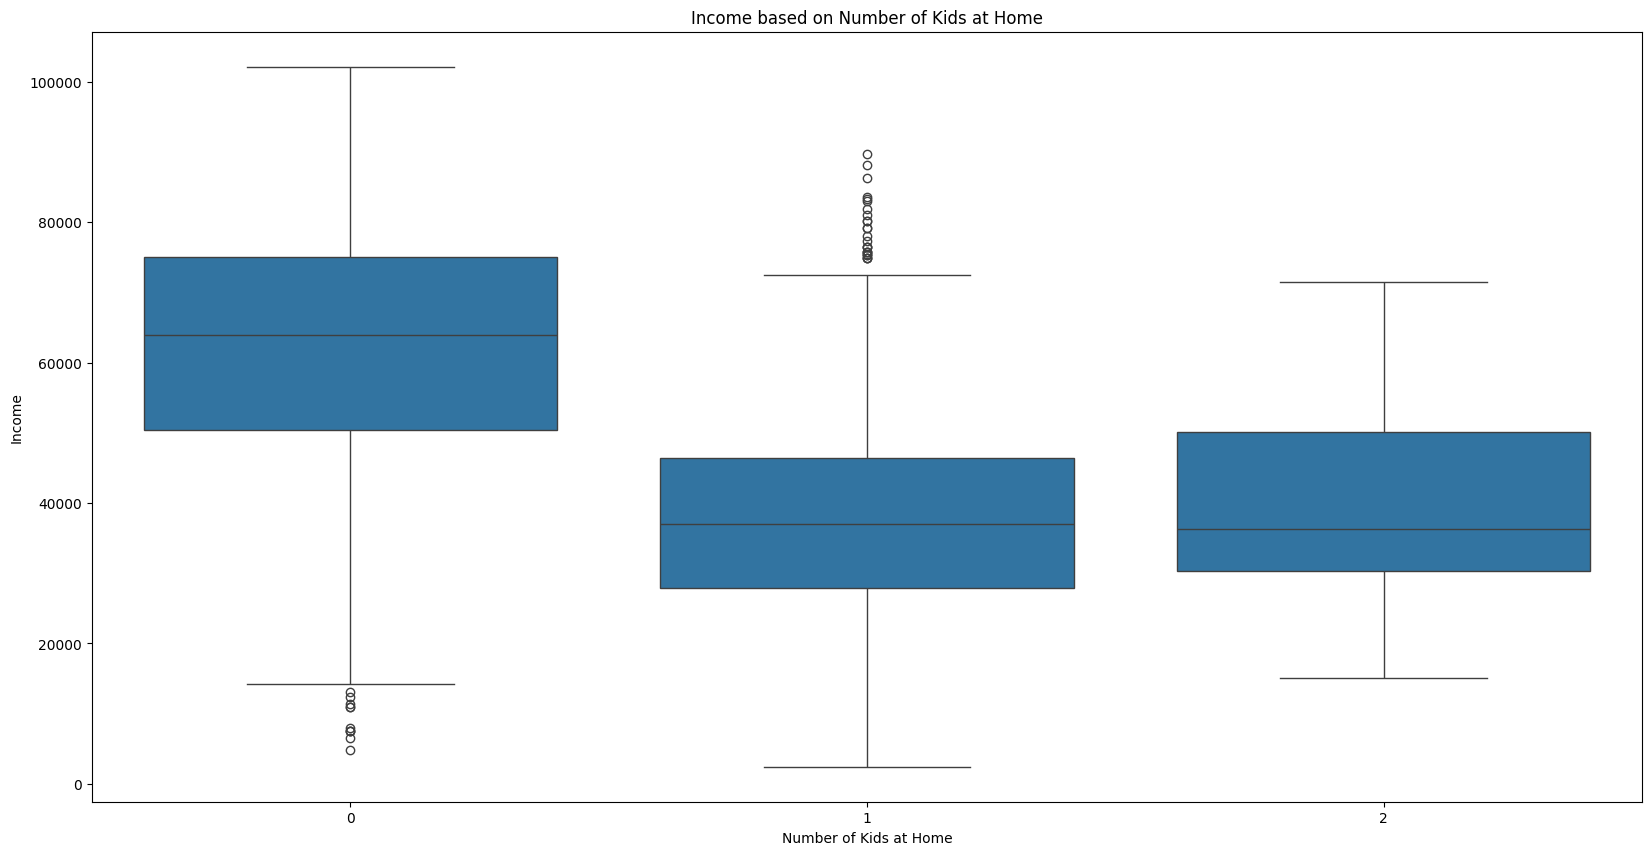

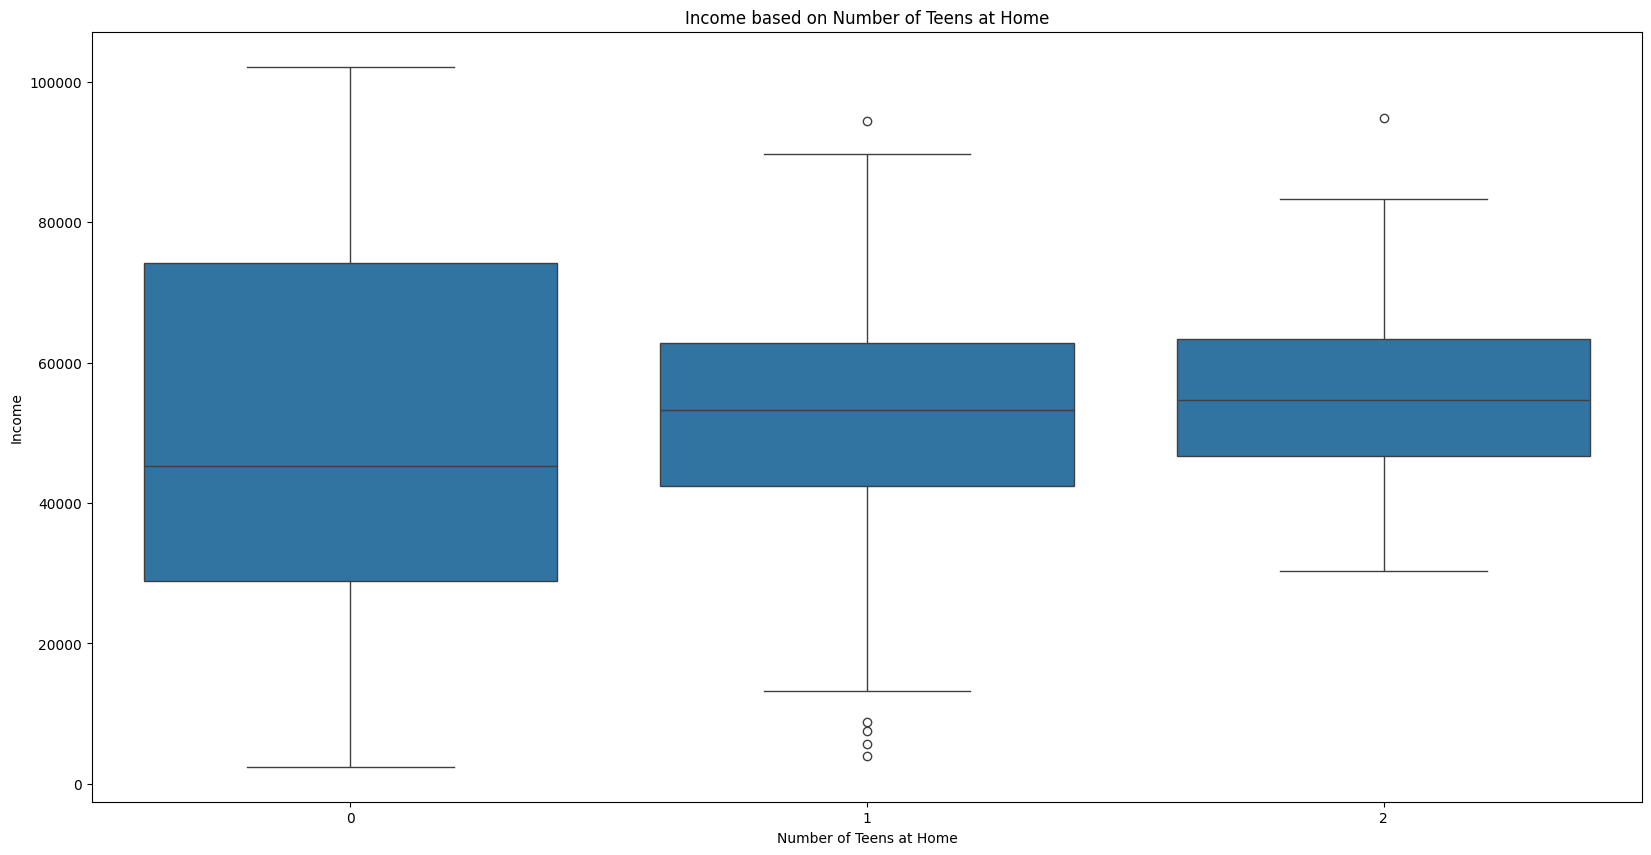

In [27]:
# Capped income boxplot based on number of kids at home
plt.figure(figsize=(20,10))
sns.boxplot(x='Kidhome', y=' Income ', data=filtered_data)
plt.xlabel('Number of Kids at Home')
plt.ylabel('Income')
plt.title('Income based on Number of Kids at Home')
# print mean for each number of kids at home
print(filtered_data.groupby('Kidhome')[' Income '].describe())
print()
# Capped income boxplot based on number of teens at home
plt.figure(figsize=(20,10))
sns.boxplot(x='Teenhome', y=' Income ', data=filtered_data)
plt.xlabel('Number of Teens at Home')
plt.ylabel('Income')
plt.title('Income based on Number of Teens at Home')
print(filtered_data.groupby('Teenhome')[' Income '].describe())

In [28]:
# Prepare the original data for comparison
original_data_0_kids = mdata[mdata['Kidhome'] == 0][' Income ']
original_data_1_kid = mdata[mdata['Kidhome'] == 1][' Income ']
original_data_2_kids = mdata[mdata['Kidhome'] == 2][' Income ']

original_data_0_teens = mdata[mdata['Teenhome'] == 0][' Income ']
original_data_1_teen = mdata[mdata['Teenhome'] == 1][' Income ']
original_data_2_teens = mdata[mdata['Teenhome'] == 2][' Income ']

# Prepare the filtered data for each group
filtered_data_0_kids = filtered_data[filtered_data['Kidhome'] == 0][' Income ']
filtered_data_1_kid = filtered_data[filtered_data['Kidhome'] == 1][' Income ']
filtered_data_2_kids = filtered_data[filtered_data['Kidhome'] == 2][' Income ']

filtered_data_0_teens = filtered_data[filtered_data['Teenhome'] == 0][' Income ']
filtered_data_1_teen = filtered_data[filtered_data['Teenhome'] == 1][' Income ']
filtered_data_2_teens = filtered_data[filtered_data['Teenhome'] == 2][' Income ']




from scipy.stats import ttest_ind

# Perform t-tests for households with 0 kids
t_stat_0_kids, p_val_0_kids = ttest_ind(original_data_0_kids, filtered_data_0_kids)
# Perform t-tests for households with 1 kid
t_stat_1_kid, p_val_1_kid = ttest_ind(original_data_1_kid, filtered_data_1_kid)
# Perform t-tests for households with 2 kids
t_stat_2_kids, p_val_2_kids = ttest_ind(original_data_2_kids, filtered_data_2_kids)

# Perform t-tests for households with 0 teens
t_stat_0_teens, p_val_0_teens = ttest_ind(original_data_0_teens, filtered_data_0_teens)
# Perform t-tests for households with 1 teen
t_stat_1_teen, p_val_1_teen = ttest_ind(original_data_1_teen, filtered_data_1_teen)
# Perform t-tests for households with 2 teens
t_stat_2_teens, p_val_2_teens = ttest_ind(original_data_2_teens, filtered_data_2_teens)

# Print the results
print(f"T-Test for 0 kids: T-Statistic={t_stat_0_kids}, P-Value={p_val_0_kids}")
print(f"T-Test for 1 kid: T-Statistic={t_stat_1_kid}, P-Value={p_val_1_kid}")
print(f"T-Test for 2 kids: T-Statistic={t_stat_2_kids}, P-Value={p_val_2_kids}")

print(f"T-Test for 0 teens: T-Statistic={t_stat_0_teens}, P-Value={p_val_0_teens}")
print(f"T-Test for 1 teen: T-Statistic={t_stat_1_teen}, P-Value={p_val_1_teen}")
print(f"T-Test for 2 teens: T-Statistic={t_stat_2_teens}, P-Value={p_val_2_teens}")

T-Test for 0 kids: T-Statistic=0.29060701946408274, P-Value=0.7713753387395302
T-Test for 1 kid: T-Statistic=1.0169530640831057, P-Value=0.3093130363167951
T-Test for 2 kids: T-Statistic=0.0, P-Value=1.0
T-Test for 0 teens: T-Statistic=0.9324828396856729, P-Value=0.3511847544906187
T-Test for 1 teen: T-Statistic=0.042206739891077746, P-Value=0.9663379959321358
T-Test for 2 teens: T-Statistic=-0.0726501528290272, P-Value=0.9422296284357125


# Outlier Analysis and Decision:
## Based on the statistical analysis conducted using two-sample t-tests, it was found that the removal of income outliers did not result in a statistically significant difference in mean income for any of the groups categorized by the number of kids and teens at home. The p-values from the t-tests were all greater than 0.05, indicating no significant impact. Therefore, it has been decided to retain the income outliers in the dataset for subsequent analyses. This decision ensures the preservation of data integrity and variability while maintaining robustness against the influence of extreme values.

count      2240.000000
mean      52235.887961
std       25040.043654
min        1730.000000
25%       35538.750000
50%       51301.000000
75%       68289.750000
max      666666.000000
Name:  Income , dtype: float64


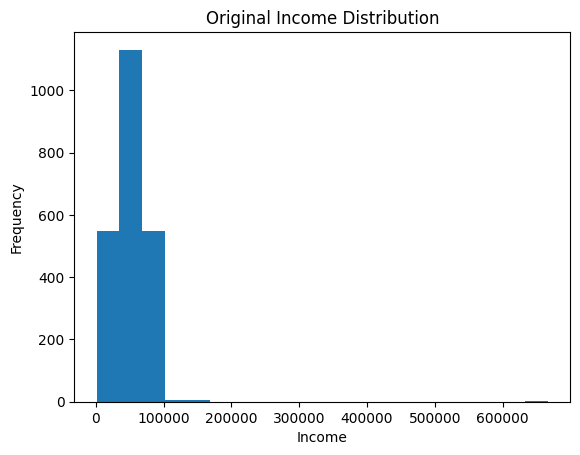

In [34]:
# distribution of income vs frequency   
mdata[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Original Income Distribution')

print(mdata[' Income '].describe())


count      2228.000000
mean      51576.268417
std       20493.139360
min        2447.000000
25%       35434.750000
50%       51144.500000
75%       68098.250000
max      102160.000000
Name:  Income , dtype: float64


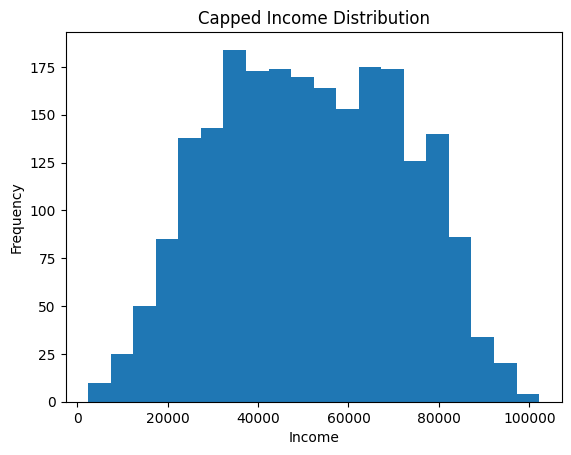

In [35]:
# distribution of capped income vs frequency
capped_income_mdata[' Income '].plot(kind='hist',bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Capped Income Distribution')

print(capped_income_mdata[' Income '].describe())